In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
ind = [i for i in range(0,801)]
# col = [i for i in range(1, 64)]
df = pd.read_csv("result_velocities_10x5_5151_nu20_f4000_newriecker_mu0_step800_49try_bordercond.txt", sep=" ", names=ind, index_col=False)

In [12]:
df_elem = pd.read_csv("elements_df_10x5_5151.txt", names=['id', 'node1', 'node2', 'node3', 'node4'])
# df_elem

In [13]:
df_nodes = pd.read_csv("nodes_df_10x5_5151.txt", names=['ind', 'x', 'y'])

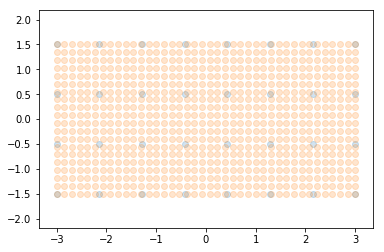

In [95]:
plt.scatter(df_nodes.x, df_nodes.y, alpha=0.2)
plt.scatter(meshXY[:, 0], meshXY[:, 1], alpha=0.2)
plt.axis('equal')
plt.show()

In [12]:
def interpolate_test1(xi, eta):
    N1 = (1-xi) * (1-eta) / 4.0
    N2 = (1+xi) * (1-eta) / 4.0
    N3 = (1+xi) * (1+eta) / 4.0
    N4 = (1-xi) * (1+eta) / 4.0
    
    res = N1 * test_v[0] + N2 * test_v[1] \
        + N3 * test_v[2] + N4 * test_v[3]
    return res

In [16]:
x_grid = np.linspace(df_nodes[df_nodes.ind == 5].x.values[0], df_nodes[df_nodes.ind == 6].x.values[0], 2)
y_grid = np.linspace(df_nodes[df_nodes.ind == 5].y.values[0], df_nodes[df_nodes.ind == 23].y.values[0], 2)

In [155]:
gridX = np.linspace(-0.428571, -1.2857100000000001, 100)
gridY = np.linspace(0.5, 1.5, 100)

meshX, meshY = np.meshgrid(gridX, gridY)

predX = np.linspace(-1,1,100)
predY = np.linspace(-1,1,100)
predX, predY = np.meshgrid(predX, predY)

In [156]:
meshXY = np.dstack((meshX, meshY)).reshape(10000, 2)

predXY = np.dstack((predX, predY)).reshape(10000, 2)
predict = interpolate_test1(predXY[:, 0], predXY[:, 1])

In [94]:
test_v[3]

0.01767766952966369

In [89]:
test_v2[2]

0.01767766952966369

In [157]:
test_v2 = np.array([np.sqrt(df.loc[2*(5-1), 2]**2 + df.loc[2*(5-1)+1, 2]**2),
                   np.sqrt(df.loc[2*(6-1), 2]**2 + df.loc[2*(6-1)+1, 2]**2),
                   np.sqrt(df.loc[2*(24-1), 2]**2 + df.loc[2*(24-1)+1, 2]**2),
                   np.sqrt(df.loc[2*(23-1), 2]**2 + df.loc[2*(23-1)+1, 2]**2)])

def interpolate_test2(xi, eta):
    N1 = (1-xi) * (1-eta) / 4.0
    N2 = (1+xi) * (1-eta) / 4.0
    N3 = (1+xi) * (1+eta) / 4.0
    N4 = (1-xi) * (1+eta) / 4.0
    
    res = N1 * test_v2[0] + N2 * test_v2[1] \
        + N3 * test_v2[2] + N4 * test_v2[3]
    return res

gridX = np.linspace(0.428571,-0.428571, 100)
gridY = np.linspace(0.5, 1.5, 100)

meshX, meshY = np.meshgrid(gridX, gridY)

meshXY2 = np.dstack((meshX, meshY)).reshape(10000, 2)

predX = np.linspace(-1,1,100)
predY = np.linspace(-1,1,100)
predX, predY = np.meshgrid(predY, predX)
predXY = np.dstack((predX, predY)).reshape(10000, 2)
predict2 = interpolate_test2(predXY[:, 0], predXY[:, 1])

In [163]:
test_v2 = np.array([np.sqrt(df.loc[2*(7-1), 2]**2 + df.loc[2*(7-1)+1, 2]**2),
                   np.sqrt(df.loc[2*(8-1), 2]**2 + df.loc[2*(8-1)+1, 2]**2),
                   np.sqrt(df.loc[2*(26-1), 2]**2 + df.loc[2*(26-1)+1, 2]**2),
                   np.sqrt(df.loc[2*(25-1), 2]**2 + df.loc[2*(25-1)+1, 2]**2)])

def interpolate_test3(xi, eta):
    N1 = (1-xi) * (1-eta) / 4.0
    N2 = (1+xi) * (1-eta) / 4.0
    N3 = (1+xi) * (1+eta) / 4.0
    N4 = (1-xi) * (1+eta) / 4.0
    
    res = N1 * test_v2[0] + N2 * test_v2[1] \
        + N3 * test_v2[2] + N4 * test_v2[3]
    return res

gridX = np.linspace(-1.2857100000000001,-2.1428599999999998, 100)
gridY = np.linspace(0.5, 1.5, 100)

meshX, meshY = np.meshgrid(gridX, gridY)

meshXY3 = np.dstack((meshX, meshY)).reshape(10000, 2)

predX = np.linspace(-1,1,100)
predY = np.linspace(-1,1,100)
predX, predY = np.meshgrid(predY, predX)
predXY = np.dstack((predX, predY)).reshape(10000, 2)
predict3 = interpolate_test2(predXY[:, 0], predXY[:, 1])

In [164]:
pred = np.concatenate((predict, predict2, predict3), axis=0)#([predict, predict2]

In [92]:
pred.shape

(20000,)

In [161]:
interpolate_test1(0, -1), interpolate_test2(1, -1)

(0.03535519763797114, 0.03535533905932738)

In [147]:
predict2[9]

0.03535533905932738

In [165]:
mesh = np.concatenate((meshXY, meshXY2, meshXY3), axis=0)

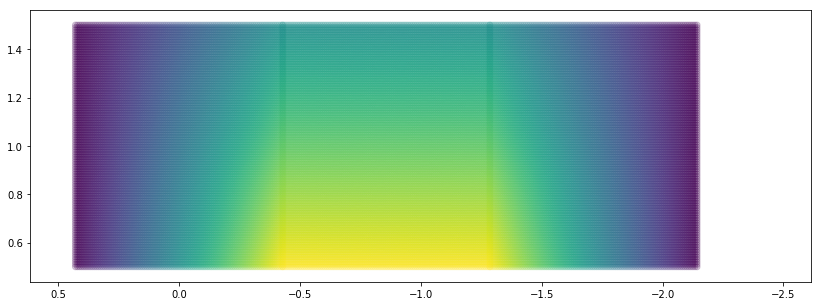

In [169]:
plt.figure(figsize=(14,5))
plt.scatter(mesh[:, 0], mesh[:, 1], c=pred, alpha=0.2)
# plt.scatter(meshXY[:, 0], meshXY[:, 1], c=pred[:10000], alpha=0.2)
plt.axis('equal')
plt.xlim(0.5, -2.5)
plt.show()

In [172]:
df_elem

,id,node1,node2,node3,node4
0,1.0,1.0,3.0,21.0,20.0
1,2.0,3.0,4.0,22.0,21.0
2,3.0,4.0,5.0,23.0,22.0
3,4.0,5.0,6.0,24.0,23.0
4,5.0,6.0,7.0,25.0,24.0
5,6.0,7.0,8.0,26.0,25.0
6,7.0,8.0,2.0,10.0,26.0
7,8.0,20.0,21.0,27.0,19.0
8,9.0,21.0,22.0,28.0,27.0
9,10.0,22.0,23.0,29.0,28.0


In [183]:
for index in  df_elem.id:
    print(df_elem[df_elem.id == index].node1.values[0])

1.0
3.0
4.0
5.0
6.0
7.0
8.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
19.0
27.0
28.0
29.0
30.0
31.0
32.0


In [247]:
del mesh
del pred

In [243]:

node1 = df_elem[df_elem.id == 5].node1.values[0]
node2 = df_elem[df_elem.id == 5].node2.values[0]
node3 = df_elem[df_elem.id == 5].node3.values[0]
node4 = df_elem[df_elem.id == 5].node4.values[0]

x1 = df_nodes[df_nodes.ind == node1].x.values[0]
x2 = df_nodes[df_nodes.ind == node2].x.values[0]
y1 = df_nodes[df_nodes.ind == node1].y.values[0]
y2 = df_nodes[df_nodes.ind == node4].y.values[0]

test_v = np.array([np.sqrt(df.loc[2*(node1-1), 2]**2 + df.loc[2*(node1-1)+1, 2]**2),
                   np.sqrt(df.loc[2*(node2-1), 2]**2 + df.loc[2*(node2-1)+1, 2]**2),
                   np.sqrt(df.loc[2*(node3-1), 2]**2 + df.loc[2*(node3-1)+1, 2]**2),
                   np.sqrt(df.loc[2*(node4-1), 2]**2 + df.loc[2*(node4-1)+1, 2]**2)])

def interpolate_test(xi, eta):
    N1 = (1-xi) * (1-eta) / 4.0
    N2 = (1+xi) * (1-eta) / 4.0
    N3 = (1+xi) * (1+eta) / 4.0
    N4 = (1-xi) * (1+eta) / 4.0

    res = N1 * test_v[0] + N2 * test_v[1] \
        + N3 * test_v[2] + N4 * test_v[3]
    return res

gridX = np.linspace(x1, x2, 100)
gridY = np.linspace(y2, y1, 100)

meshX, meshY = np.meshgrid(gridX, gridY)

meshXY = np.dstack((meshX, meshY)).reshape(10000, 2)

predX = np.linspace(1,-1,100)
predY = np.linspace(1,-1,100)
predX, predY = np.meshgrid(predY, predX)
predXY = np.dstack((predX, predY)).reshape(10000, 2)
predict = interpolate_test(predXY[:, 0], predXY[:, 1])

try:
    pred = np.concatenate((pred, predict), axis=0)
    mesh = np.concatenate((mesh, meshXY), axis=0)
except:
    pred = np.array(predict)
    mesh = np.array(meshXY)

In [241]:
test_v[0]

0.03535533905932738

In [240]:
interpolate_test(1, -1)

0.0353550562166149

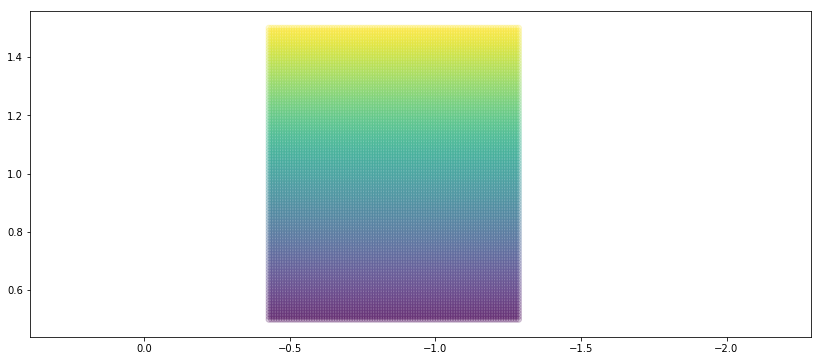

In [244]:
plt.figure(figsize=(14,6))
plt.scatter(mesh[:, 0], mesh[:, 1], c=pred, alpha=0.2)
# plt.scatter(meshXY[:, 0], meshXY[:, 1], c=pred[:10000], alpha=0.2)
plt.axis('equal')
plt.xlim(-0.4, -1.5)
plt.show()

In [ ]:
del mesh
del pred

In [95]:
# работает правильно!!!
#
for index in  df_elem.id:
    
    node1 = df_elem[df_elem.id == index].node1.values[0]
    node2 = df_elem[df_elem.id == index].node2.values[0]
    node3 = df_elem[df_elem.id == index].node3.values[0]
    node4 = df_elem[df_elem.id == index].node4.values[0]
    
    x1 = df_nodes[df_nodes.ind == node1].x.values[0]
    x2 = df_nodes[df_nodes.ind == node2].x.values[0]
    y1 = df_nodes[df_nodes.ind == node1].y.values[0]
    y2 = df_nodes[df_nodes.ind == node4].y.values[0]
    
    test_v = np.array([np.sqrt(df.loc[2*(node1-1), 2]**2 + df.loc[2*(node1-1)+1, 2]**2),
                       np.sqrt(df.loc[2*(node2-1), 2]**2 + df.loc[2*(node2-1)+1, 2]**2),
                       np.sqrt(df.loc[2*(node3-1), 2]**2 + df.loc[2*(node3-1)+1, 2]**2),
                       np.sqrt(df.loc[2*(node4-1), 2]**2 + df.loc[2*(node4-1)+1, 2]**2)])

    def interpolate_test(xi, eta):
        N1 = (1-xi) * (1-eta) / 4.0
        N2 = (1+xi) * (1-eta) / 4.0
        N3 = (1+xi) * (1+eta) / 4.0
        N4 = (1-xi) * (1+eta) / 4.0

        res = N1 * test_v[0] + N2 * test_v[1] \
            + N3 * test_v[2] + N4 * test_v[3]
        return res

    gridX = np.linspace(x2, x1, 100)
    gridY = np.linspace(y2, y1, 100)

    meshX, meshY = np.meshgrid(gridX, gridY)

    meshXY = np.dstack((meshX, meshY)).reshape(10000, 2)

    predX = np.linspace(1,-1,100)
    predY = np.linspace(1,-1,100)
    predX, predY = np.meshgrid(predY, predX)
    predXY = np.dstack((predX, predY)).reshape(10000, 2)
    predict = interpolate_test(predXY[:, 0], predXY[:, 1])
    
    try:
        pred = np.concatenate((pred, predict), axis=0)
        mesh = np.concatenate((mesh, meshXY), axis=0)
    except:
        pred = np.array(predict)
        mesh = np.array(meshXY)

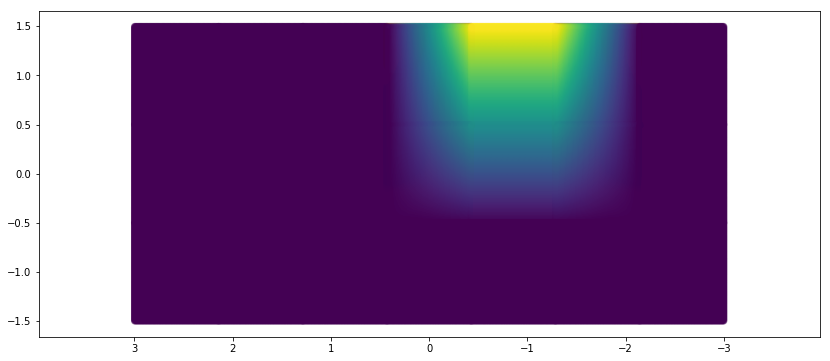

In [251]:
plt.figure(figsize=(14,6))
plt.scatter(mesh[:, 0], mesh[:, 1], c=pred, alpha=0.2)
# plt.scatter(meshXY[:, 0], meshXY[:, 1], c=pred[:10000], alpha=0.2)
plt.axis('equal')
plt.xlim(2.5, -2.5)
plt.show()

In [332]:
df1000 = df

In [24]:
df1000 = df

def print_one(num):
#     del mesh
#     del pred
    
    for index in  df_elem.id:

        node1 = df_elem[df_elem.id == index].node1.values[0]
        node2 = df_elem[df_elem.id == index].node2.values[0]
        node3 = df_elem[df_elem.id == index].node3.values[0]
        node4 = df_elem[df_elem.id == index].node4.values[0]

        x1 = df_nodes[df_nodes.ind == node1].x.values[0]
        x2 = df_nodes[df_nodes.ind == node2].x.values[0]
        y1 = df_nodes[df_nodes.ind == node1].y.values[0]
        y2 = df_nodes[df_nodes.ind == node4].y.values[0]

        test_v = np.array([np.sqrt(df1000.loc[2*(node1-1), num]**2 + df1000.loc[2*(node1-1)+1, num]**2),
                           np.sqrt(df1000.loc[2*(node2-1), num]**2 + df1000.loc[2*(node2-1)+1, num]**2),
                           np.sqrt(df1000.loc[2*(node3-1), num]**2 + df1000.loc[2*(node3-1)+1, num]**2),
                           np.sqrt(df1000.loc[2*(node4-1), num]**2 + df1000.loc[2*(node4-1)+1, num]**2)])

        def interpolate_test(xi, eta):
            N1 = (1-xi) * (1-eta) / 4.0
            N2 = (1+xi) * (1-eta) / 4.0
            N3 = (1+xi) * (1+eta) / 4.0
            N4 = (1-xi) * (1+eta) / 4.0

            res = N1 * test_v[0] + N2 * test_v[1] \
                + N3 * test_v[2] + N4 * test_v[3]
            return res

        NUM = 3
        gridX = np.linspace(x2, x1, NUM)
        gridY = np.linspace(y2, y1, NUM)

        meshX, meshY = np.meshgrid(gridX, gridY)

        meshXY = np.dstack((meshX, meshY)).reshape(NUM**2, 2)

        predX = np.linspace(1,-1,NUM)
        predY = np.linspace(1,-1,NUM)
        predX, predY = np.meshgrid(predY, predX)
        predXY = np.dstack((predX, predY)).reshape(NUM**2, 2)
        predict = interpolate_test(predXY[:, 0], predXY[:, 1])

        try:
            pred = np.concatenate((pred, predict), axis=0)
            mesh = np.concatenate((mesh, meshXY), axis=0)
        except:
            pred = np.array(predict)
            mesh = np.array(meshXY)

    fig, ax = plt.subplots(figsize=(10,6))

#     fig = plt.figure(figsize=(6,10))
    plt.scatter(mesh[:, 0], mesh[:, 1], c=pred, alpha=0.2)
    # plt.scatter(meshXY[:, 0], meshXY[:, 1], c=pred[:10000], alpha=0.2)
#     cmap = mpl.cm.get_cmap('RdBu', N) 
#     cs = ax.pcolor(a, cmap=cmap)
#     cbar = fig.colorbar(cs)
    plt.axis('equal')
    plt.xlim(2.5, -2.5)
    plt.show()

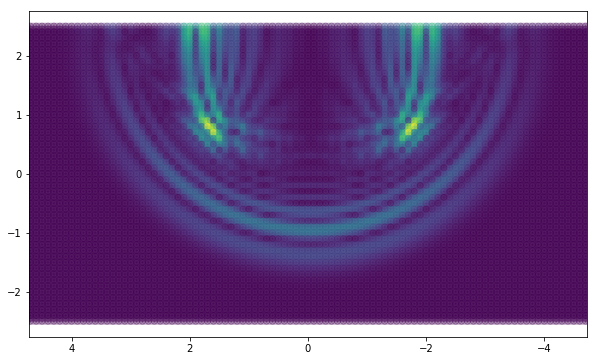

In [21]:
print_one(120)

E:\anaconda\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


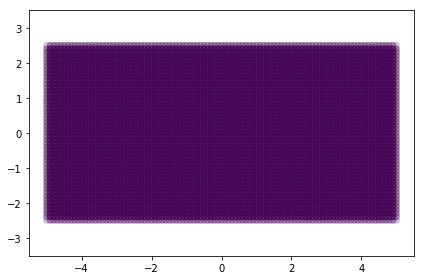

In [25]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
# from matplotlib.animation import PillowWriter
df1000 = df

fig, ax = plt.subplots()
fig.set_tight_layout(True)

def update(num):
    for index in  df_elem.id:

        node1 = df_elem[df_elem.id == index].node1.values[0]
        node2 = df_elem[df_elem.id == index].node2.values[0]
        node3 = df_elem[df_elem.id == index].node3.values[0]
        node4 = df_elem[df_elem.id == index].node4.values[0]

        x1 = df_nodes[df_nodes.ind == node1].x.values[0]
        x2 = df_nodes[df_nodes.ind == node2].x.values[0]
        y1 = df_nodes[df_nodes.ind == node1].y.values[0]
        y2 = df_nodes[df_nodes.ind == node4].y.values[0]

        test_v = np.array([np.sqrt(df1000.loc[2*(node1-1), num]**2 + df1000.loc[2*(node1-1)+1, num]**2),
                           np.sqrt(df1000.loc[2*(node2-1), num]**2 + df1000.loc[2*(node2-1)+1, num]**2),
                           np.sqrt(df1000.loc[2*(node3-1), num]**2 + df1000.loc[2*(node3-1)+1, num]**2),
                           np.sqrt(df1000.loc[2*(node4-1), num]**2 + df1000.loc[2*(node4-1)+1, num]**2)])

        def interpolate_test(xi, eta):
            N1 = (1-xi) * (1-eta) / 4.0
            N2 = (1+xi) * (1-eta) / 4.0
            N3 = (1+xi) * (1+eta) / 4.0
            N4 = (1-xi) * (1+eta) / 4.0

            res = N1 * test_v[0] + N2 * test_v[1] \
                + N3 * test_v[2] + N4 * test_v[3]
            return res

        NUM = 2
        gridX = np.linspace(x2, x1, NUM)
        gridY = np.linspace(y2, y1, NUM)

        meshX, meshY = np.meshgrid(gridX, gridY)

        meshXY = np.dstack((meshX, meshY)).reshape(NUM**2, 2)

        predX = np.linspace(1,-1,NUM)
        predY = np.linspace(1,-1,NUM)
        predX, predY = np.meshgrid(predY, predX)
        predXY = np.dstack((predX, predY)).reshape(NUM**2, 2)
        predict = interpolate_test(predXY[:, 0], predXY[:, 1])

        try:
            pred = np.concatenate((pred, predict), axis=0)
            mesh = np.concatenate((mesh, meshXY), axis=0)
        except:
            pred = np.array(predict)
            mesh = np.array(meshXY)

#     fig, ax = plt.subplots(figsize=(14,6))
    
    ax.scatter(mesh[:, 0], mesh[:, 1], c=pred, alpha=0.2)
    # plt.scatter(meshXY[:, 0], meshXY[:, 1], c=pred[:10000], alpha=0.2)
    ax.axis('equal')
#     ax.xlim(2.5, -2.5)
    
    return ax

anim = FuncAnimation(fig, update, frames=np.arange(2, 100, 2), interval=250)

In [26]:
anim.save('line_10x5_5151_tochechn_1.gif', dpi=80, writer='imagemagick')

MovieWriter imagemagick unavailable. Trying to use pillow instead.
